# Donor and Recipient - Pipeline Analysis

## Install Utilities

In [2]:
!sudo apt-get update -y --quiet -qq

In [ ]:
!sudo apt-get install -y --quiet -qq tree libcurl4-openssl-dev zlib1g-dev samtools

## Install Libraries

In [4]:
!pip install --quiet biopython pysam missingno

## Import Libraries

In [57]:
# Import Standard Python Libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

In [58]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Genomics
from Bio import SeqIO

## Helper Functions

## Analyze Datasets

In [2]:
%%bash
for filename in `ls ../cromwell-final-outputs/*donor*bam.complex.bam_count.txt`
do
    echo `basename $filename .bam.complex.bam_count.txt` `cat "$filename"` 
done 

reads-to-donor_MMd_MMr 74380
reads-to-donor_MMd_MUr 2
reads-to-donor_MMd_UUr 29144
reads-to-donor_MUd_MMr 614
reads-to-donor_MUd_UMr 74
reads-to-donor_MUd_UUr 2838
reads-to-donor_UMd_MMr 14
reads-to-donor_UMd_MUr 36
reads-to-donor_UMd_UUr 650
reads-to-donor_UUd_MMr 19489420
reads-to-donor_UUd_MUr 594
reads-to-donor_UUd_UMr 222
reads-to-donor_UUd_UUr 38962


In [3]:
%%bash
for filename in `ls ../cromwell-final-outputs/*recipient*bam.complex.bam_count.txt`
do
    echo `basename $filename .bam.complex.bam_count.txt` `cat "$filename"` 
done 

reads-to-recipient_MMd_MMr 79443
reads-to-recipient_MMd_MUr 2
reads-to-recipient_MMd_UUr 29024
reads-to-recipient_MUd_MMr 1363
reads-to-recipient_MUd_UMr 74
reads-to-recipient_MUd_UUr 2838
reads-to-recipient_UMd_MMr 14
reads-to-recipient_UMd_MUr 36
reads-to-recipient_UMd_UUr 650
reads-to-recipient_UUd_MMr 20335117
reads-to-recipient_UUd_MUr 594
reads-to-recipient_UUd_UMr 222
reads-to-recipient_UUd_UUr 38962


### Filter files by

- donor_MMd_MUr
- donor_MMd_UMr
- donor_MUd_MUr
- donor_MUd_UMr
- donor_UMd_MUr
- donor_UMd_UMr
- recipient_MMd_MUr
- recipient_MMd_UMr
- recipient_MUd_MUr
- recipient_MUd_UMr
- recipient_UMd_MUr
- recipient_UMd_UMr

In [105]:
%%bash
for filename in ../cromwell-final-outputs/*donor_MMd_MUr*bam.complex.bam_count.txt ../cromwell-final-outputs/*donor_MMd_UMr*bam.complex.bam_count.txt ../cromwell-final-outputs/*donor_MUd_MUr*bam.complex.bam_count.txt ../cromwell-final-outputs/*donor_MUd_UMr*bam.complex.bam_count.txt ../cromwell-final-outputs/*donor_UMd_MUr*bam.complex.bam_count.txt ../cromwell-final-outputs/*donor_UMd_UMr*bam.complex.bam_count.txt ../cromwell-final-outputs/*recipient_MMd_MUr*bam.complex.bam_count.txt ../cromwell-final-outputs/*recipient_MMd_UMr*bam.complex.bam_count.txt ../cromwell-final-outputs/*recipient_MUd_MUr*bam.complex.bam_count.txt ../cromwell-final-outputs/*recipient_MUd_UMr*bam.complex.bam_count.txt ../cromwell-final-outputs/*recipient_UMd_MUr*bam.complex.bam_count.txt ../cromwell-final-outputs/*recipient_UMd_UMr*bam.complex.bam_count.txt 
do
    if [ -f "$filename" ]
    then echo `basename $filename .bam.complex.bam_count.txt` `cat "$filename"`
    fi
done 

reads-to-donor_MMd_MUr 2
reads-to-donor_MUd_UMr 90
reads-to-donor_UMd_MUr 24
reads-to-recipient_MMd_MUr 2
reads-to-recipient_MUd_UMr 90
reads-to-recipient_UMd_MUr 24


In [106]:
!samtools view ../cromwell-final-outputs/*donor_MUd_UMr.bam.complex.bam | cut -f1 | sort | uniq | wc -l

45


In [108]:
!grep "^>" ../cromwell-final-outputs/*donor_MUd_UMr.bam.complex.fasta | cut -d ">" -f 2 | sort | uniq | wc -l

45


In [111]:
!ls ../cromwell-final-outputs/*.blastn

../cromwell-final-outputs/reads-to-donor_MMd_MUr.bam.complex.fasta.blastn
../cromwell-final-outputs/reads-to-donor_MUd_UMr.bam.complex.fasta.blastn
../cromwell-final-outputs/reads-to-donor_UMd_MUr.bam.complex.fasta.blastn
../cromwell-final-outputs/reads-to-recipient_MMd_MUr.bam.complex.fasta.blastn
../cromwell-final-outputs/reads-to-recipient_MUd_UMr.bam.complex.fasta.blastn
../cromwell-final-outputs/reads-to-recipient_UMd_MUr.bam.complex.fasta.blastn


In [123]:
headers = ["seqid", "qgi", "qacc", "qaccver", "qlen", "sseqid", "sallseqid", "sgi",
           "sallgi", "sacc", "saccver", "sallacc", "slen", "qstart", "qend", "sstart",
           'send', "qseq", "sseq", "evalue", "bitscore", "score", "length", "pident",
           'nident', "mismatch", "positive", "gapopen", "gaps", "ppos", "frames",
           "qframe", "sframe", "btop", "staxid", "ssciname", "scomname", "sblastname",
           "sskingdom", "staxids", "sscinames", "scomnames", "sblastnames",
           "sskingdoms", "stitle", "salltitles", "sstrand", "qcovs", "qcovhsp", "qcovus" ]
blast = pd.read_table('../cromwell-final-outputs/reads-to-donor_MUd_UMr.bam.complex.fasta.blastn', 
    header=None, 
    names=headers, 
    na_values=["?"], 
    engine='python')

In [124]:
blast['qgi'].nunique()

45

In [125]:
blast['qgi'].unique().tolist()

['SRR5377828.5004777',
 'SRR5377828.1016983',
 'SRR5377828.4926754',
 'SRR5377828.2464365',
 'SRR5377828.1575507',
 'SRR5377828.882267',
 'SRR5377828.3320862',
 'SRR5377828.1995274',
 'SRR5377828.147051',
 'SRR5377828.10587826',
 'SRR5377828.8167545',
 'SRR5377828.4627422',
 'SRR5377828.6216292',
 'SRR5377828.844608',
 'SRR5377828.201270',
 'SRR5377828.12236784',
 'SRR5377828.9629548',
 'SRR5377828.4862745',
 'SRR5377828.259691',
 'SRR5377828.923447',
 'SRR5377828.7137810',
 'SRR5377828.6797526',
 'SRR5377828.9216082',
 'SRR5377828.5179720',
 'SRR5377828.11340537',
 'SRR5377828.1437390',
 'SRR5377828.9882843',
 'SRR5377828.7371773',
 'SRR5377828.9153411',
 'SRR5377828.194771',
 'SRR5377828.2248722',
 'SRR5377828.10017624',
 'SRR5377828.3967274',
 'SRR5377828.12264797',
 'SRR5377828.11390762',
 'SRR5377828.2277170',
 'SRR5377828.4327946',
 'SRR5377828.5017926',
 'SRR5377828.775618',
 'SRR5377828.3864444',
 'SRR5377828.8079704',
 'SRR5377828.4228838',
 'SRR5377828.10268931',
 'SRR5377828

In [126]:
blast.head(2)

,seqid,qgi,qacc,qaccver,qlen,sseqid,sallseqid,sgi,sallgi,sacc,...,sscinames,scomnames,sblastnames,sskingdoms,stitle,salltitles,sstrand,qcovs,qcovhsp,qcovus
0,0,SRR5377828.5004777,SRR5377828.5004777,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,minus,100,100,100,NaN
1,0,SRR5377828.5004777,SRR5377828.5004777,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,plus,100,100,100,NaN


In [127]:
blast.loc[blast['sscinames'] == 'Pseudomonas aeruginosa'].head(2)

,seqid,qgi,qacc,qaccver,qlen,sseqid,sallseqid,sgi,sallgi,sacc,...,sscinames,scomnames,sblastnames,sskingdoms,stitle,salltitles,sstrand,qcovs,qcovhsp,qcovus
0,0,SRR5377828.5004777,SRR5377828.5004777,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,minus,100,100,100,NaN
1,0,SRR5377828.5004777,SRR5377828.5004777,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,plus,100,100,100,NaN


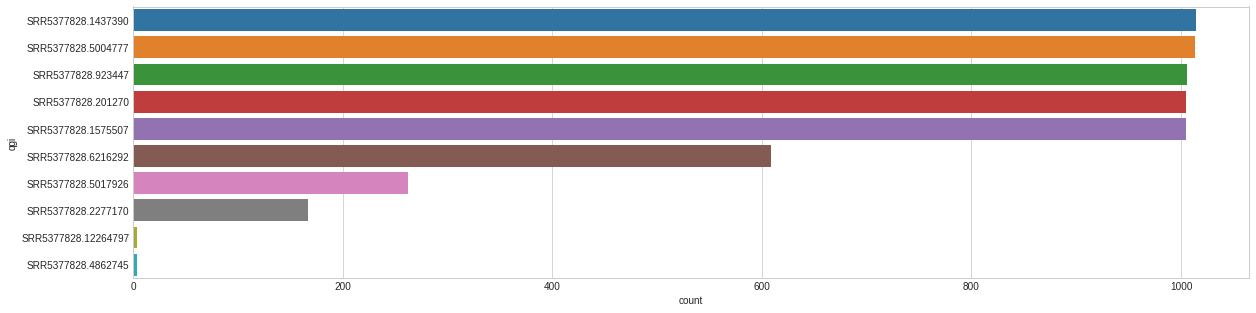

In [128]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
blast_pse = data=blast.loc[blast['sscinames'] == 'Pseudomonas aeruginosa']
sns.countplot(y="qgi", data=blast_pse, order = blast_pse["qgi"].value_counts().index);

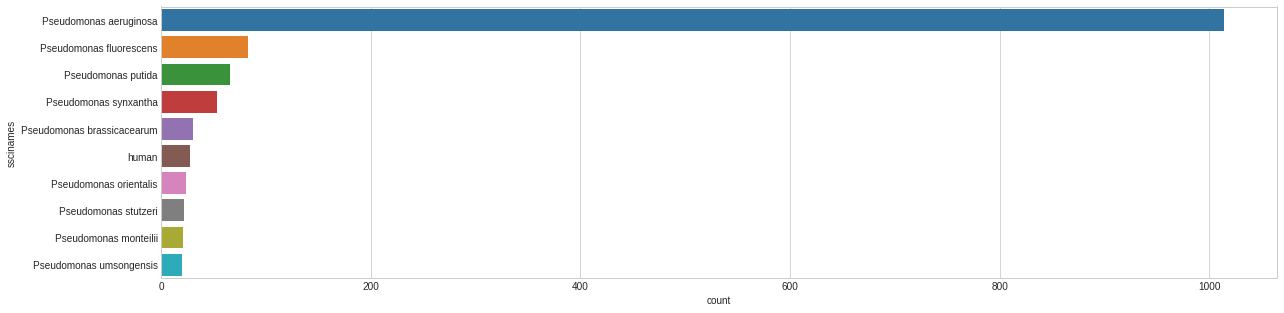

In [129]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5))
blast_srr = blast.loc[blast['qgi'] == 'SRR5377828.1437390']
sns.countplot(y="sscinames", data=blast_srr, order = blast_srr['sscinames'].value_counts().iloc[:10].index);

In [130]:
df = blast.groupby(['qgi', 'sscinames']).size().nlargest(100, keep='first').to_frame('blast hits').reset_index().sort_values(['blast hits'], ascending=False)
df

,qgi,sscinames,blast hits
0,SRR5377828.11340537,eukaryotic synthetic construct,6906
1,SRR5377828.9882843,Escherichia coli,2854
2,SRR5377828.7371773,Escherichia coli,2599
3,SRR5377828.7137810,Escherichia coli,2545
4,SRR5377828.3967274,Escherichia coli,2342
...,...,...,...
95,SRR5377828.1995274,Salmonella enterica subsp. enterica serovar In...,230
96,SRR5377828.3320862,Salmonella enterica subsp. enterica serovar In...,230
97,SRR5377828.4327946,Salmonella enterica subsp. enterica serovar In...,230
98,SRR5377828.147051,Salmonella enterica subsp. enterica serovar In...,228


In [131]:
df[df['sscinames'].str.contains("Pseudomonas")]

,qgi,sscinames,blast hits
30,SRR5377828.1437390,Pseudomonas aeruginosa,1014
31,SRR5377828.5004777,Pseudomonas aeruginosa,1013
32,SRR5377828.923447,Pseudomonas aeruginosa,1006
33,SRR5377828.1575507,Pseudomonas aeruginosa,1005
34,SRR5377828.201270,Pseudomonas aeruginosa,1005
47,SRR5377828.6216292,Pseudomonas aeruginosa,609
86,SRR5377828.5017926,Pseudomonas aeruginosa,262
